In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from matplotlib import font_manager
font_path = 'C:\\Users\\amita\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NewCM10-Regular.otf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()


from reliability.Fitters import Fit_Weibull_3P

# Weibull Analysis

## Definining Weibull function

In [6]:
def weibull_function(alpha, beta, gamma, x):
    return  (beta/alpha) * ((x-gamma)/alpha)**(beta-1) * np.exp(-((x-gamma)/alpha)**beta)

## 1. For winter data

In [7]:
season = 'winter'
data = np.loadtxt(f'{season}.txt', unpack=True, usecols=[0], skiprows=1)

In [8]:
data

array([15., 16., 15., ..., 14., 14., 13.])

In [5]:
season_fit = Fit_Weibull_3P(data, method='MLE', show_probability_plot = False)

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22175/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         11.7107       0.0437607   11.6253   11.7968
     Beta         1.89328       0.0098402   1.87409   1.91267
    Gamma        0.690648       0.0297791  0.634681  0.751551 

Goodness of fit    Value
 Log-likelihood -68562.7
           AICc   137131
            BIC   137155
             AD  38.9723 



### Plotting the weibull function using fitted parameters vs original data

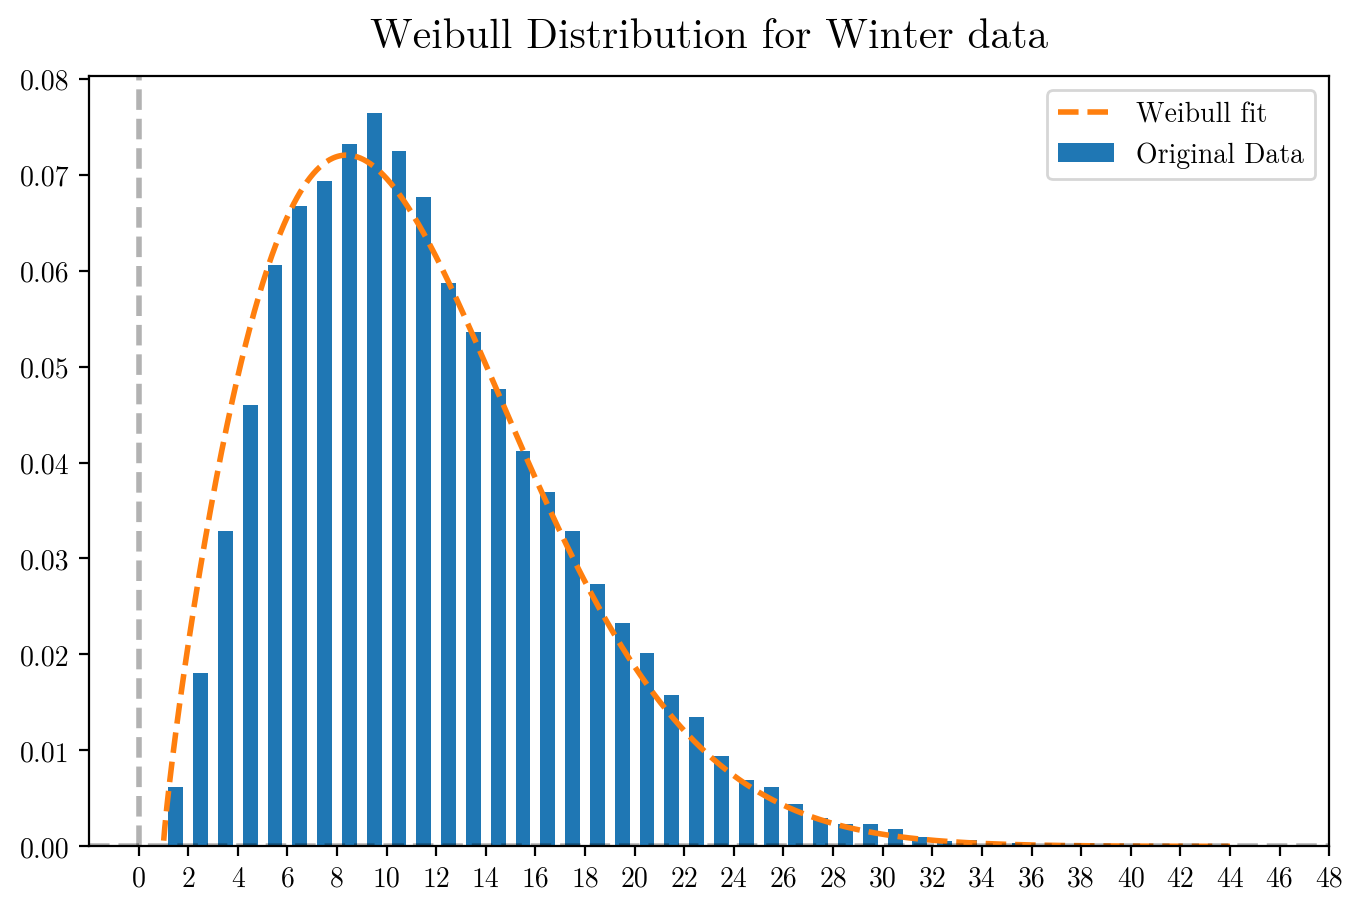

In [10]:
plt.figure(figsize=[8,5], dpi=200)

# Plotting histogram for the values
hist, bin_edges = np.histogram(data, bins=int(data.max()))
hist = hist / len(data)
speed = (bin_edges[1:] + bin_edges[:-1]) / 2

plt.bar(speed, hist, width=0.6, align='center', label='Original Data')


# Plotting weibull function
x = np.linspace(0, int(data.max()), 1000)
y = weibull_function(season_fit.alpha, season_fit.beta, season_fit.gamma, x)

plt.plot(x,y, label = f'Weibull fit', c='tab:orange', lw=2, ls='--')


# A horizontal line at y=0
plt.axhline(y=0, color='k', linestyle='--', linewidth=2, alpha=0.3)

# A vertical line at x=0
plt.axvline(x=0, color='k', linestyle='--', linewidth=2, alpha=0.3)

plt.xticks(np.arange(0,50,2))

plt.legend()
plt.title(f'Weibull Distribution for {season.capitalize()} data', fontsize=15, pad=10)
plt.show()

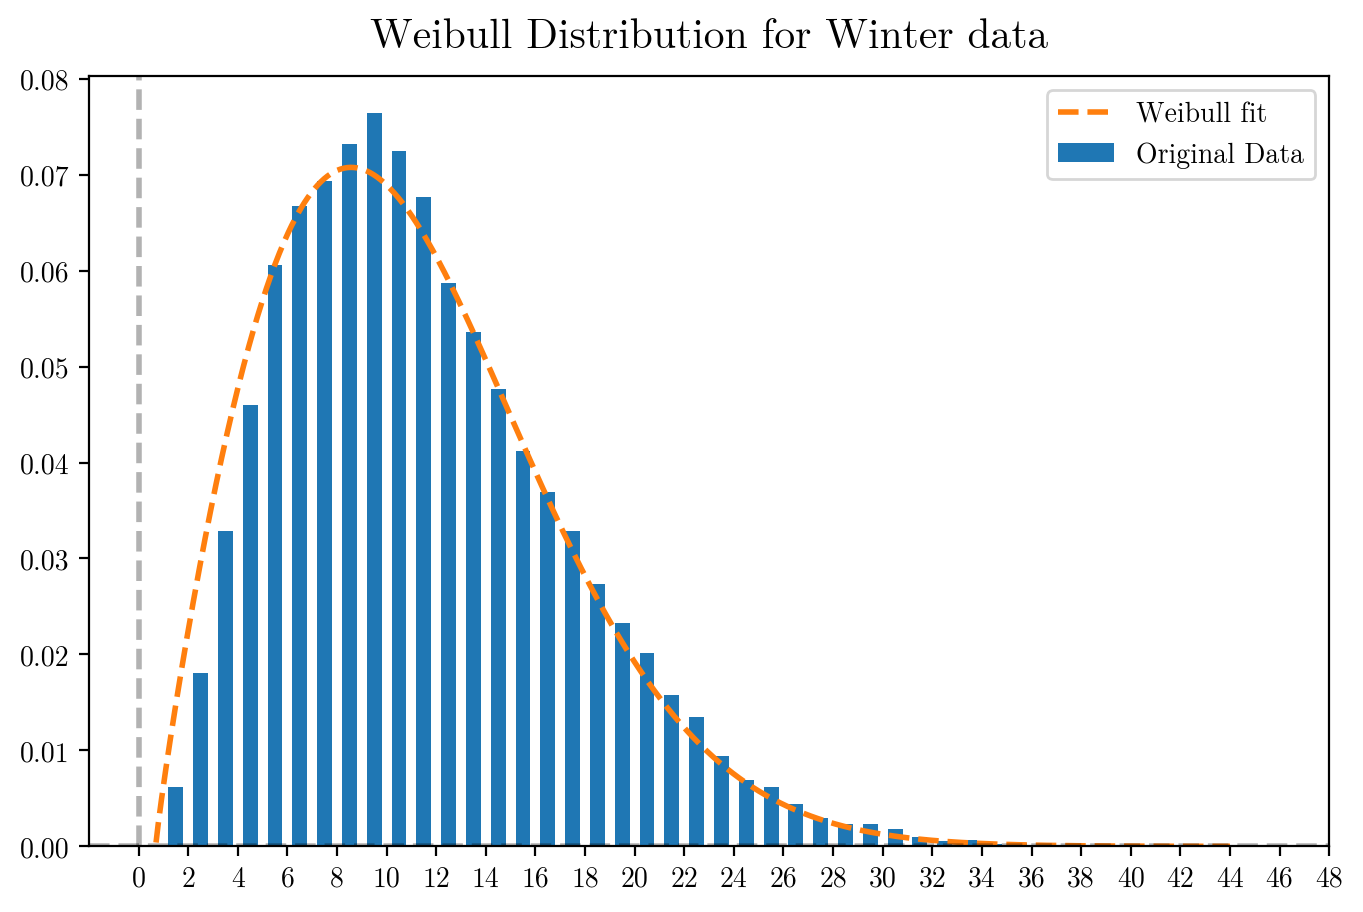

In [7]:
plt.figure(figsize=[8,5], dpi=200)

# Plotting histogram for the values
hist, bin_edges = np.histogram(data, bins=int(data.max()))
hist = hist / len(data)
speed = (bin_edges[1:] + bin_edges[:-1]) / 2

plt.bar(speed, hist, width=0.6, align='center', label='Original Data')


# Plotting weibull function
x = np.linspace(0, int(data.max()), 1000)
y = weibull_function(season_fit.alpha, season_fit.beta, season_fit.gamma, x)

plt.plot(x,y, label = f'Weibull fit', c='tab:orange', lw=2, ls='--')


# A horizontal line at y=0
plt.axhline(y=0, color='k', linestyle='--', linewidth=2, alpha=0.3)

# A vertical line at x=0
plt.axvline(x=0, color='k', linestyle='--', linewidth=2, alpha=0.3)

plt.xticks(np.arange(0,50,2))

plt.legend()
plt.title(f'Weibull Distribution for {season.capitalize()} data', fontsize=15, pad=10)
plt.show()

### Let's make a function out of this

In [19]:
def weibull_fitter(data, season, method='MLE'):
    season_fit = Fit_Weibull_3P(data, method=method, show_probability_plot = False)
    
    plt.figure(figsize=[8,5], dpi=200)

    # Plotting histogram for the values
    hist, bin_edges = np.histogram(data, bins=int(data.max()))
    hist = hist / len(data)
    speed = (bin_edges[1:] + bin_edges[:-1]) / 2

    plt.bar(speed, hist, width=0.6, align='center', label='Original Data')


    # Plotting weibull function
    x = np.linspace(0, int(data.max()), 1000)
    y = weibull_function(season_fit.alpha, season_fit.beta, season_fit.gamma, x)

    plt.plot(x,y, label = f'Weibull fit', c='tab:orange', lw=2, ls='--')


    # A horizontal line at y=0
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2, alpha=0.3)

    # A vertical line at x=0
    plt.axvline(x=0, color='k', linestyle='--', linewidth=2, alpha=0.3)
    plt.xticks(np.arange(0,50,2))

    plt.legend()
    plt.title(f'Weibull Distribution for {season.capitalize()} data', fontsize=15, pad=10)
    plt.show()

## 2. For spring data

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22150/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         10.5391       0.0387165   10.4635   10.6153
     Beta         1.92678      0.00996011   1.90736    1.9464
    Gamma        0.627977       0.0299781  0.571886  0.689569 

Goodness of fit    Value
 Log-likelihood -65854.9
           AICc   131716
            BIC   131740
             AD  52.9332 



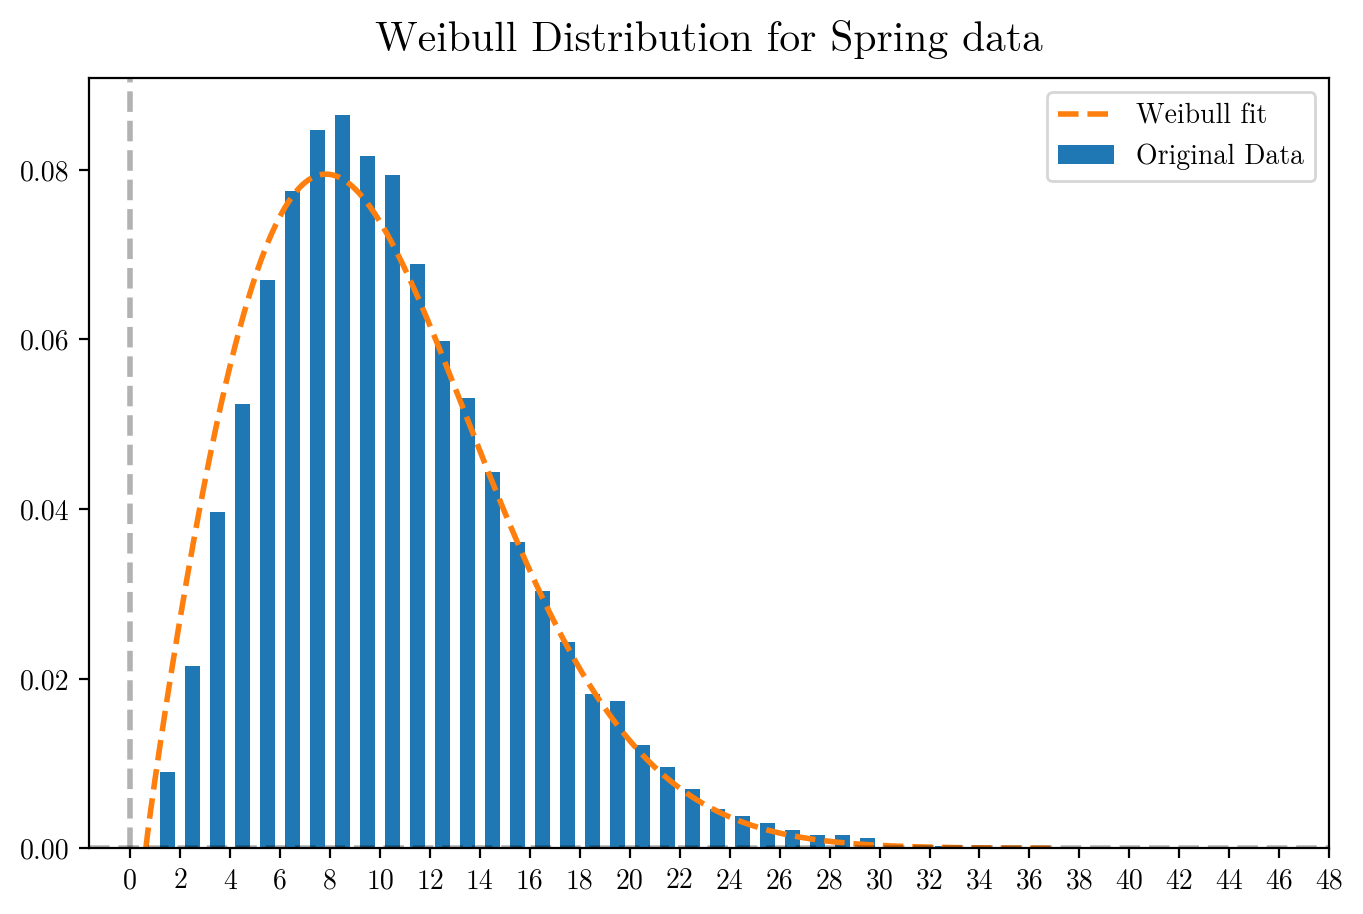

In [10]:
season = 'spring'
data = np.loadtxt(f'{season}.txt', unpack=True, usecols=[0], skiprows=1)

weibull_fitter(data, season)

## 3. For summer data

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22147/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         9.82108       0.0351051   9.75251   9.89012
     Beta         1.98065        0.010228    1.9607    2.0008
    Gamma        0.650979       0.0287911  0.596926  0.709926 

Goodness of fit   Value
 Log-likelihood  -63838
           AICc  127682
            BIC  127706
             AD 63.3702 



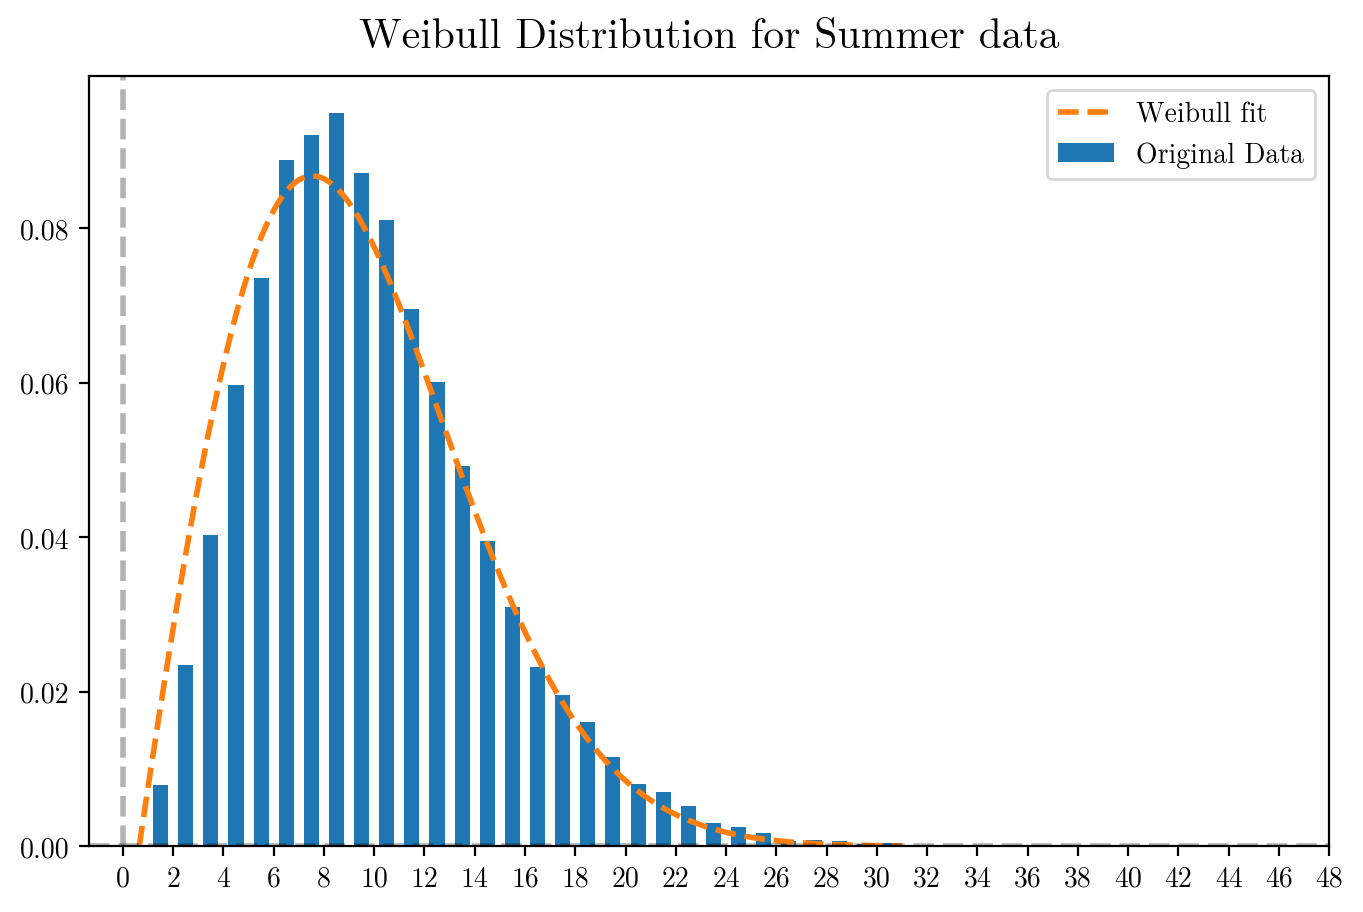

In [11]:
season = 'summer'
data = np.loadtxt(f'{season}.txt', unpack=True, usecols=[0], skiprows=1)

weibull_fitter(data, season)

## 4. For autumn data

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 21903/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         10.5144       0.0386437    10.439   10.5904
     Beta          1.9368       0.0101047    1.9171   1.95671
    Gamma        0.648999       0.0298136  0.593119  0.710144 

Goodness of fit    Value
 Log-likelihood -65003.4
           AICc   130013
            BIC   130037
             AD   48.349 



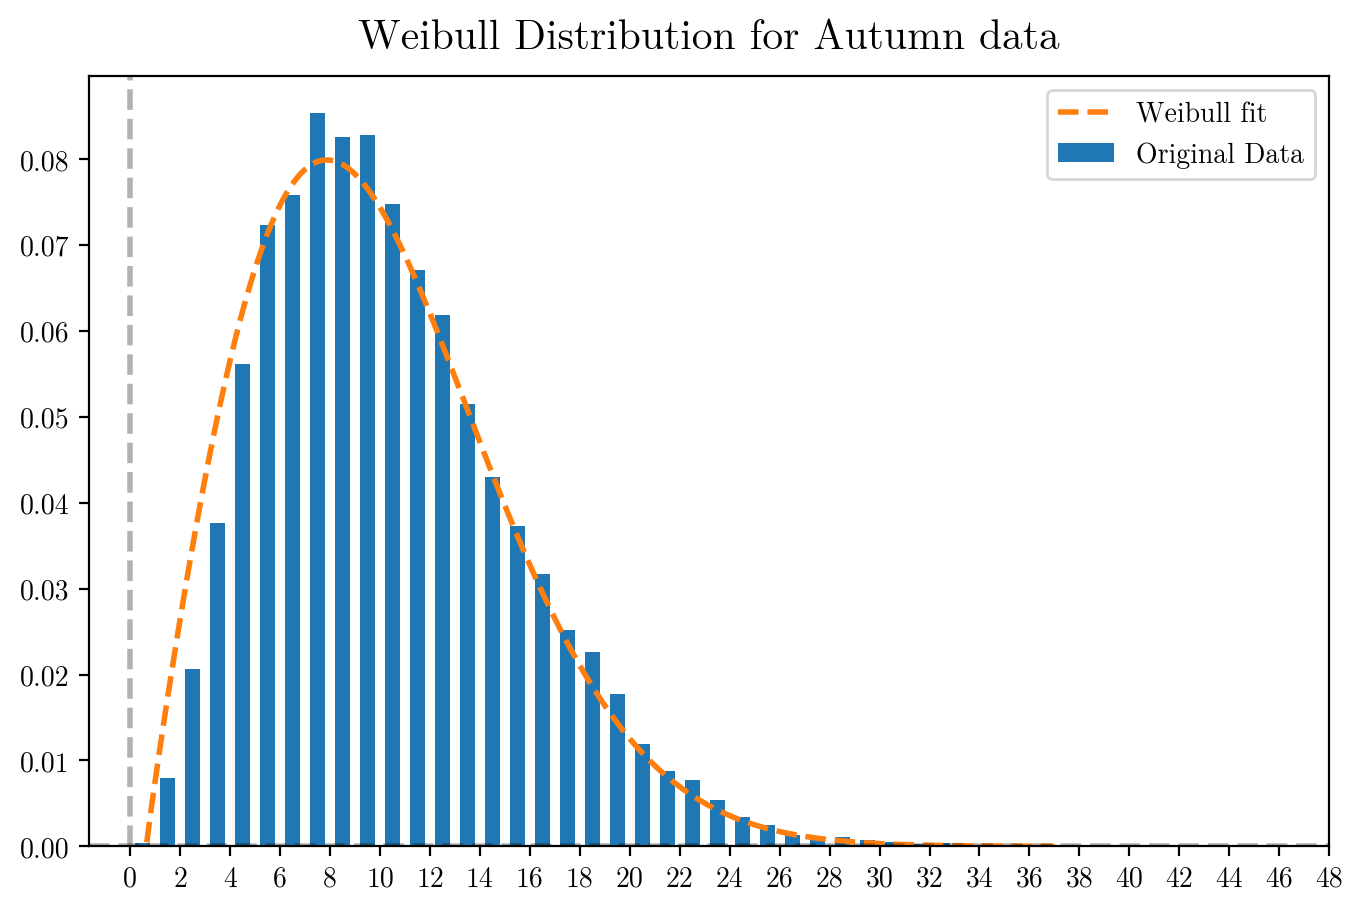

In [12]:
season = 'autumn'
data = np.loadtxt(f'{season}.txt', unpack=True, usecols=[0], skiprows=1)

weibull_fitter(data, season)

# For whole year

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 88375/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         10.6186       0.0197421   10.5799   10.6573
     Beta         1.90636      0.00493303   1.89671   1.91605
    Gamma        0.677405        0.013969  0.650572  0.705344 

Goodness of fit   Value
 Log-likelihood -264038
           AICc  528081
            BIC  528109
             AD 208.029 



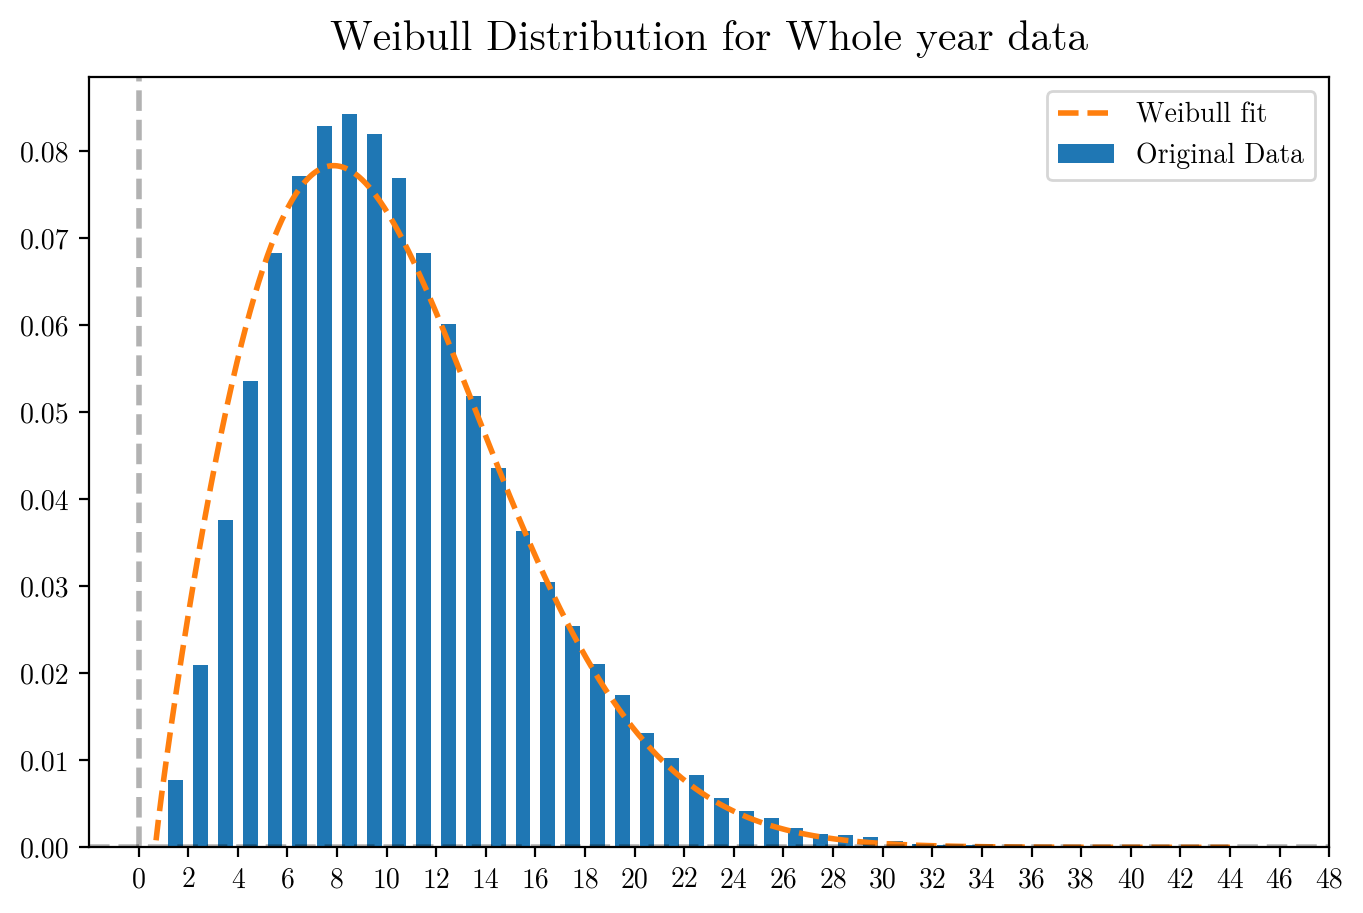

In [17]:
import pandas as pd
season = 'whole year'
data = pd.read_csv('dublin_airport_data.csv')['wdsp'].values

weibull_fitter(data, season)

## Daily data

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 3711/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         8.83146       0.0753433   8.68501   8.98037
     Beta         2.03319       0.0253235   1.98416   2.08343
    Gamma         2.28526       0.0145049   2.25701   2.31387 

Goodness of fit    Value
 Log-likelihood -10198.7
           AICc  20403.5
            BIC  20422.1
             AD  8.95714 



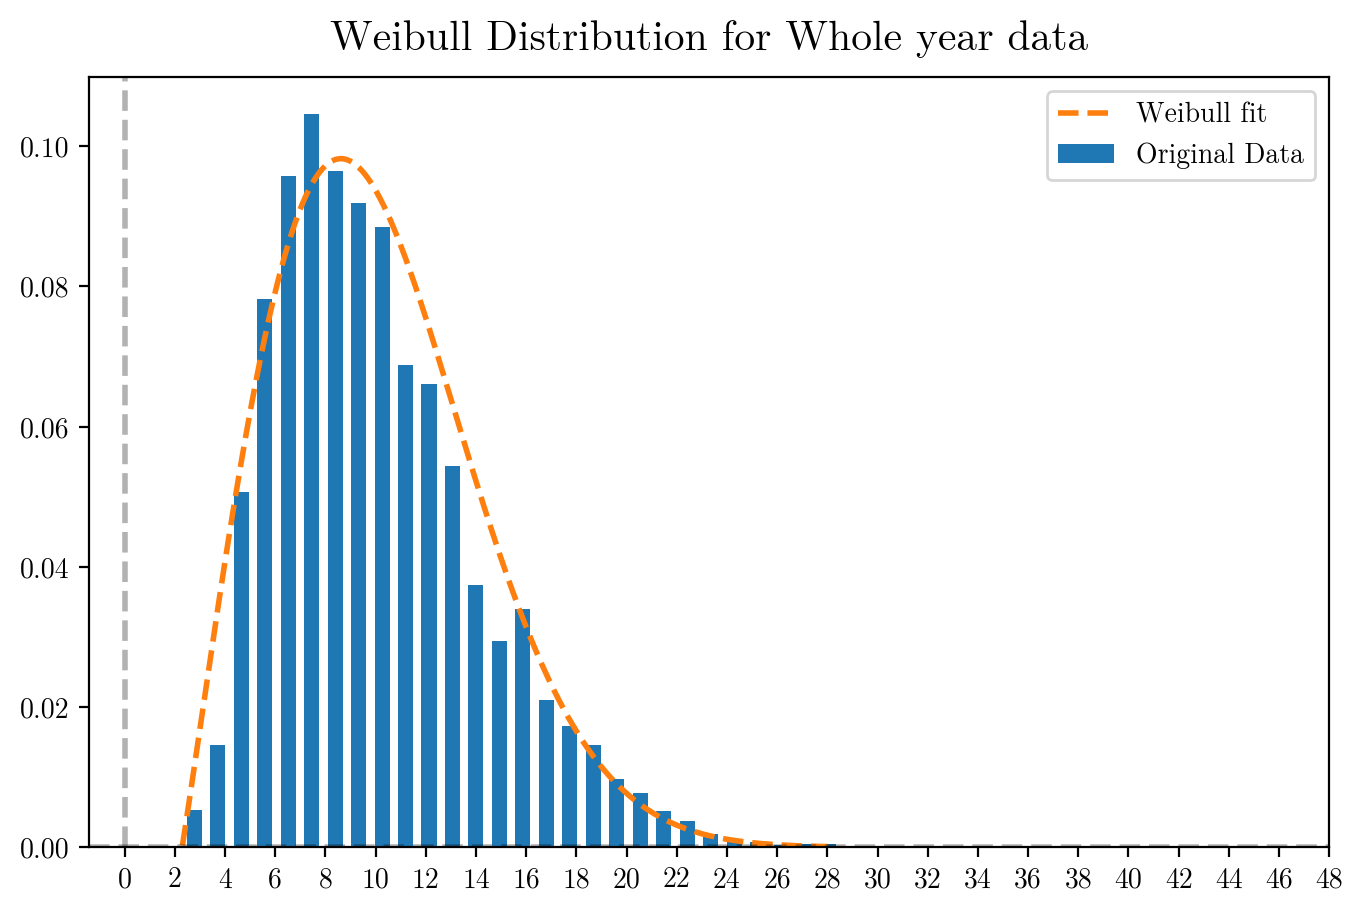

In [21]:
import pandas as pd
season = 'whole year'
data = pd.read_csv('dly532.csv')['wdsp'].values

weibull_fitter(data, season, method='MLE')